In [18]:
!curl -o sentiment140-subset.csv http://azuremlsamples.azureml.net/templatedata/Text%20-%20Input.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.8M  100 11.8M    0     0  1205k      0  0:00:10  0:00:10 --:--:-- 1771k 0:00:12  0:00:07  0:00:05 1711k


In [19]:
!ls

README.md  sentiment140-subset.csv  Tweets.ipynb


In [20]:
import os 
import pandas as pd

dirname = os.getcwd()

In [21]:
df = pd.read_csv('sentiment140-subset.csv', header=0)
df.shape

(160000, 2)

In [22]:
df = df[:10000]
df.head()

,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


In [23]:
import re

def clean_text(string_in):
    string_in = re.sub(r"@\w+", "", string_in)
    string_in = re.sub(r"\d", "", string_in)
    string_in = re.sub(r"_+", "", string_in)
    string_in = string_in.lower()
    return string_in.strip()
    

In [31]:
df["tweet_text_cleaned"] = df.tweet_text.apply(clean_text)

In [32]:
from nltk.tokenize import RegexpTokenizer
preprocessed = [" ".join(RegexpTokenizer(r'\w+').\
                         tokenize(df.tweet_text_cleaned[idx])) \
                for idx in df.index]


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFV
from sklearn.feature_extraction import text

In [26]:
custom_stop_words = []
my_stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)

vectorizer = TFV(min_df = 1 , ngram_range = (1,1), stop_words = my_stop_words)

In [34]:
TDFV = vectorizer.fit_transform(preprocessed)

print("Created document-term matrix of size %d x %d" % (TDFV.shape[0],TDFV.shape[1]))


Created document-term matrix of size 10000 x 13379


In [35]:
from sklearn import decomposition 
import numpy as np

In [36]:
nmf = decomposition.NMF(init = 'nndsvd', n_components = 3, max_iter = 200)

In [39]:
W = nmf.fit_transform(TDFV)
H = nmf.components_
print("Generated factor W of size %s and factor H of size %s" % (str(W.shape), str(H.shape)))

Generated factor W of size (10000, 3) and factor H of size (3, 13379)


In [40]:
feature_names = vectorizer.get_feature_names()

In [41]:
n_top_words = 10

In [43]:
for topic_idx, topic in enumerate(H):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                   for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Topic #0:
good day work just today morning going like night really

Topic #1:
quot love http just com know amp new like best

Topic #2:
thanks following ff lol got haha great hey hope follow



In [44]:
!pip install wordcloud

     |████████████████████████████████| 368kB 3.5MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [45]:
mydf = pd.DataFrame({"feature_name": feature_names})

In [47]:
for topic_idx, topic in enumerate(H):
    mydf["topic_" + str(topic_idx)] = topic
    
mylist = list(mydf.itertuples())

mywords_topic1 = []
mywords_topic2 = []
mywords_topic3 = []

for order_id, key, num1, num2, num3 in mylist:
    mywords_topic1.append((key, num1))
    mywords_topic2.append((key, num2))
    mywords_topic3.append((key, num3))

In [49]:
mywords_topic1 = sorted(mywords_topic1, key=lambda myword: myword[1], reverse=True)
mywords_topic2 = sorted(mywords_topic2, key=lambda myword: myword[1], reverse=True)
mywords_topic3 = sorted(mywords_topic3, key=lambda myword: myword[1], reverse=True)

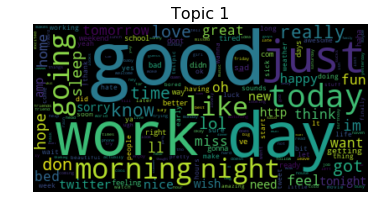

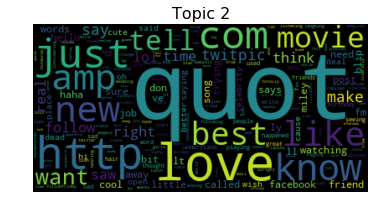

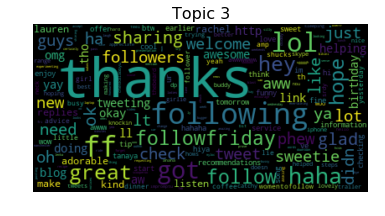

In [50]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

%matplotlib inline

def draw_wordcloud(dict, topic_number):
    wc = WordCloud(max_words=1000)    
    wordcloud = WordCloud().generate_from_frequencies(dict)
    
    plt.title('Topic %s' %str(topic_number), size = 16)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")        
    plt.show()

draw_wordcloud(dict(mywords_topic1), topic_number=1)
draw_wordcloud(dict(mywords_topic2), topic_number=2)
draw_wordcloud(dict(mywords_topic3), topic_number=3)


In [51]:
text_new = preprocessed[0:5]
tfidf_new = vectorizer.transform(text_new)
W_new = nmf.transform(tfidf_new)

In [52]:
W_new

array([[0.01436533, 0.00102542, 0.00396268],
       [0.00263183, 0.00048882, 0.        ],
       [0.02593385, 0.00429796, 0.00012156],
       [0.0248447 , 0.00870381, 0.00070209],
       [0.01683395, 0.01022362, 0.00027932]])